In [3]:
# Importamos librerías de análisis de datos
import numpy as np
import pandas as pd

# plots
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [4]:
# Cargamos el dataframe
df = pd.read_csv('train.csv', index_col='id', parse_dates=['fecha'])

In [5]:
# nos quedamos con las columnas que nos interesan
df = df[['tipodepropiedad', 'provincia', 'ciudad', 'metrostotales', 'antiguedad', 'precio', 'fecha']]
df.head()

,tipodepropiedad,provincia,ciudad,metrostotales,antiguedad,precio,fecha
id,,,,,,,
254099,Apartamento,Distrito Federal,Benito Juárez,80.0,NaN,2273000.0,2015-08-23
53461,Casa en condominio,Distrito Federal,La Magdalena Contreras,180.0,10.0,3600000.0,2013-06-28
247984,Casa,Jalisco,Tonalá,166.0,5.0,1200000.0,2015-10-17
209067,Casa,Edo. de México,Zinacantepec,67.0,1.0,650000.0,2012-03-09
185997,Apartamento,Jalisco,Zapopan,95.0,10.0,1150000.0,2016-06-07


In [6]:
df.precio.max()

12525000.0

In [7]:
propiedad = df['tipodepropiedad'].value_counts().sort_values(ascending=False).head(15).keys().tolist()

In [29]:
df_precio = df.loc[df['tipodepropiedad'].isin(propiedad)]\
    .groupby(['tipodepropiedad','precio']).agg({'precio':'mean'})\
    .rename(columns = {'precio':'promedio_precio'})

In [30]:
df_propiedad = df.groupby(['tipodepropiedad']).agg({'precio':'mean'})
df_propiedad = df_propiedad.sort_values(ascending=False, by = ['precio'])
df_propiedad = df_propiedad.head(15)
df_propiedad

,precio
tipodepropiedad,
Edificio,5.009499e+06
Rancho,4.032682e+06
Inmuebles productivos urbanos,3.743070e+06
Nave industrial,3.742600e+06
Casa uso de suelo,3.732469e+06
Terreno industrial,3.647994e+06
Huerta,3.543350e+06
Quinta Vacacional,3.187426e+06
Oficina comercial,3.148533e+06


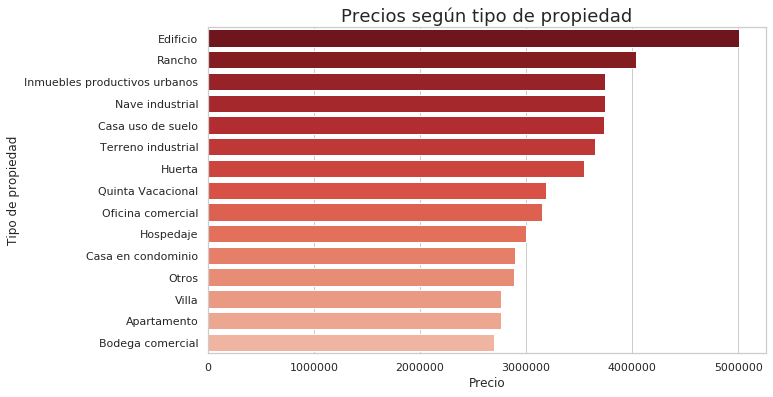

In [33]:
plt.figure(figsize=(10, 6))
g = sns.barplot(y=df_propiedad.reset_index().tipodepropiedad, x=df_propiedad.reset_index().precio, palette=sns.color_palette('Reds_r',20))
g.set_title('Precios según tipo de propiedad', fontsize=18);
g.set_xlabel('Precio');
g.set_ylabel('Tipo de propiedad');

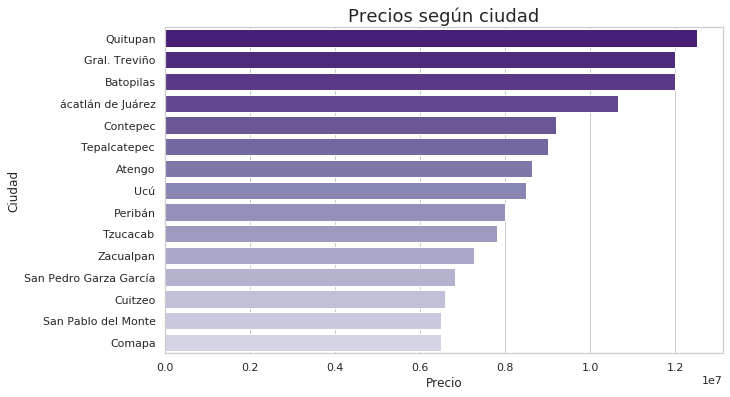

In [32]:
plt.figure(figsize=(10, 6))
g = sns.barplot(y=df_ciudad.reset_index().ciudad, x=df_ciudad.reset_index().precio, palette=sns.color_palette('Purples_r',20))
g.set_title('Precios según ciudad', fontsize=18);
g.set_xlabel('Precio');
g.set_ylabel('Ciudad');

In [27]:
df_provincia = df.groupby(['provincia']).agg({'precio':'mean'})
df_provincia = df_provincia.sort_values(ascending=False, by = ['precio'])
df_provincia = df_provincia.head(15)
df_provincia

,precio
provincia,
Distrito Federal,3.471705e+06
Edo. de México,2.762465e+06
Nuevo León,2.717758e+06
Guerrero,2.548742e+06
Quintana Roo,2.402967e+06
Jalisco,2.367694e+06
Tabasco,2.300480e+06
Puebla,2.298404e+06
Morelos,2.290088e+06


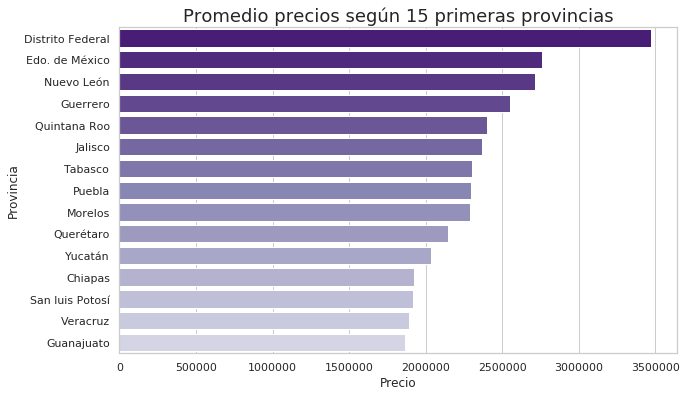

In [21]:
plt.figure(figsize=(10, 6))
g = sns.barplot(y=df_provincia.reset_index().provincia, x=df_provincia.reset_index().precio, palette=sns.color_palette('Purples_r',20))
g.set_title('Promedio precios según 15 primeras provincias', fontsize=18);
g.set_xlabel('Precio');
g.set_ylabel('Provincia');

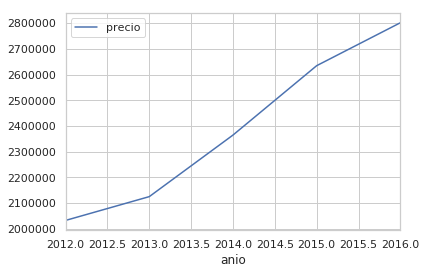

In [73]:
df['anio'] = df['fecha'].dt.year
df2=df.groupby(['anio']).agg({'precio':'mean'}).reset_index()
df2['precio'] = df2['precio'].round(2)

fig, ax = plt.subplots()
df2.plot.line(x='anio', y='precio', ax=ax)

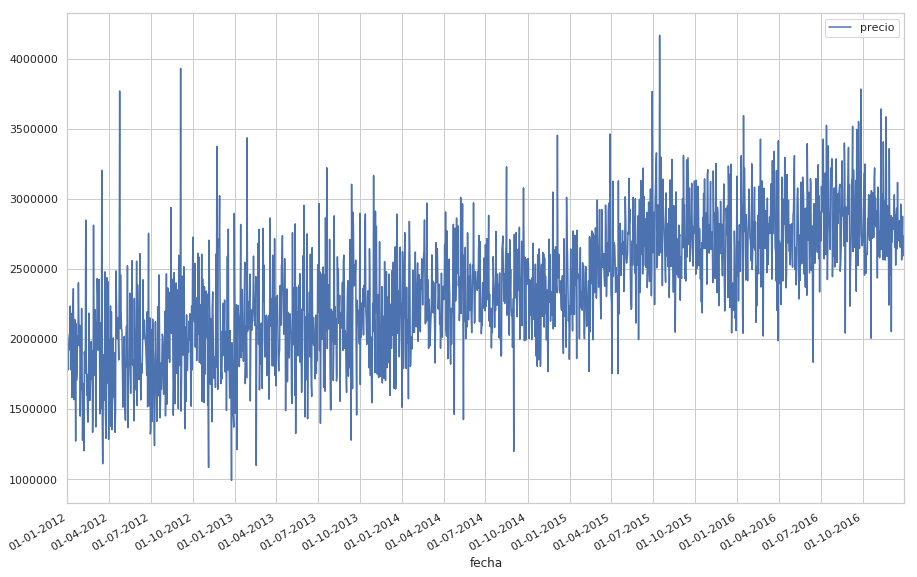

In [99]:
df2=df.groupby(['fecha']).agg({'precio':'mean'})
df2['precio'] = df2['precio'].round(2)

ax = df2.plot(figsize=(15,10))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gcf().autofmt_xdate()

plt.show()

In [107]:
df['periodo'] = df['mes'].map(str) + '-' + df['anio'].map(str)
df['periodo'] = pd.to_datetime(df['periodo'], format='%m-%Y', errors='ignore')

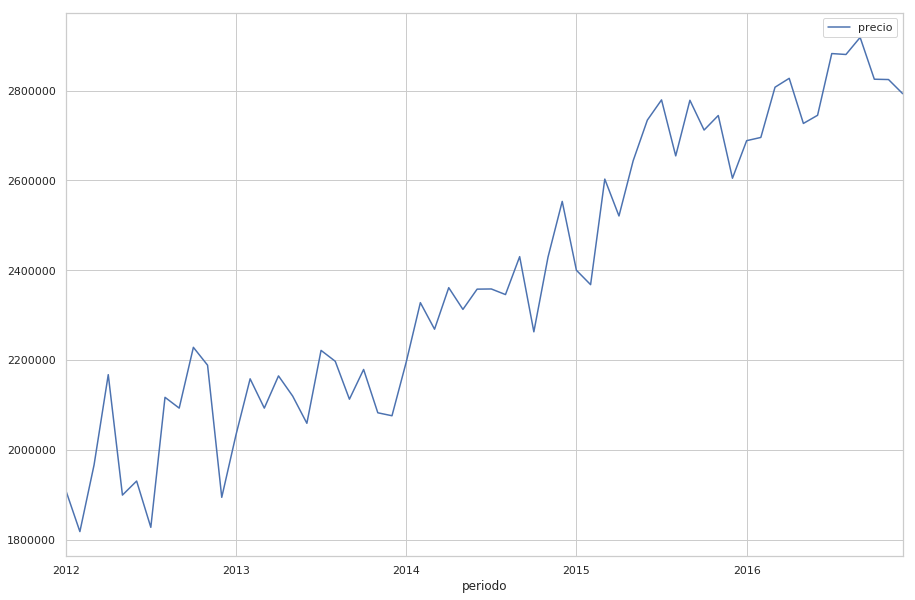

In [113]:
df2=df.groupby(['periodo']).agg({'precio':'mean'})
df2['precio'] = df2['precio'].round(2)

ax = df2.plot(figsize=(15,10))

plt.show()